# Bank Marketing 
### Main Problem (classifciation): Predict if the client will subscribe (yes / no) a term deposit 

# Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [3]:
data = pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Statistical Summary of Data

In [4]:
data.describe().T.style.background_gradient(cmap = 'coolwarm')

,count,mean,std,min,25%,50%,75%,max
age,11162.000000,41.231948,11.913369,18.000000,32.000000,39.000000,49.000000,95.000000
balance,11162.000000,1528.538524,3225.413326,-6847.000000,122.000000,550.000000,1708.000000,81204.000000
day,11162.000000,15.658036,8.420740,1.000000,8.000000,15.000000,22.000000,31.000000
duration,11162.000000,371.993818,347.128386,2.000000,138.000000,255.000000,496.000000,3881.000000
campaign,11162.000000,2.508421,2.722077,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,11162.000000,51.330407,108.758282,-1.000000,-1.000000,-1.000000,20.750000,854.000000
previous,11162.000000,0.832557,2.292007,0.000000,0.000000,0.000000,1.000000,58.000000


## Data Types and NULL

### Data Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### NULL Info

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Exploratory Data Analysis (EDA)

## Relationship between Features and Target

### Deposit -> Target

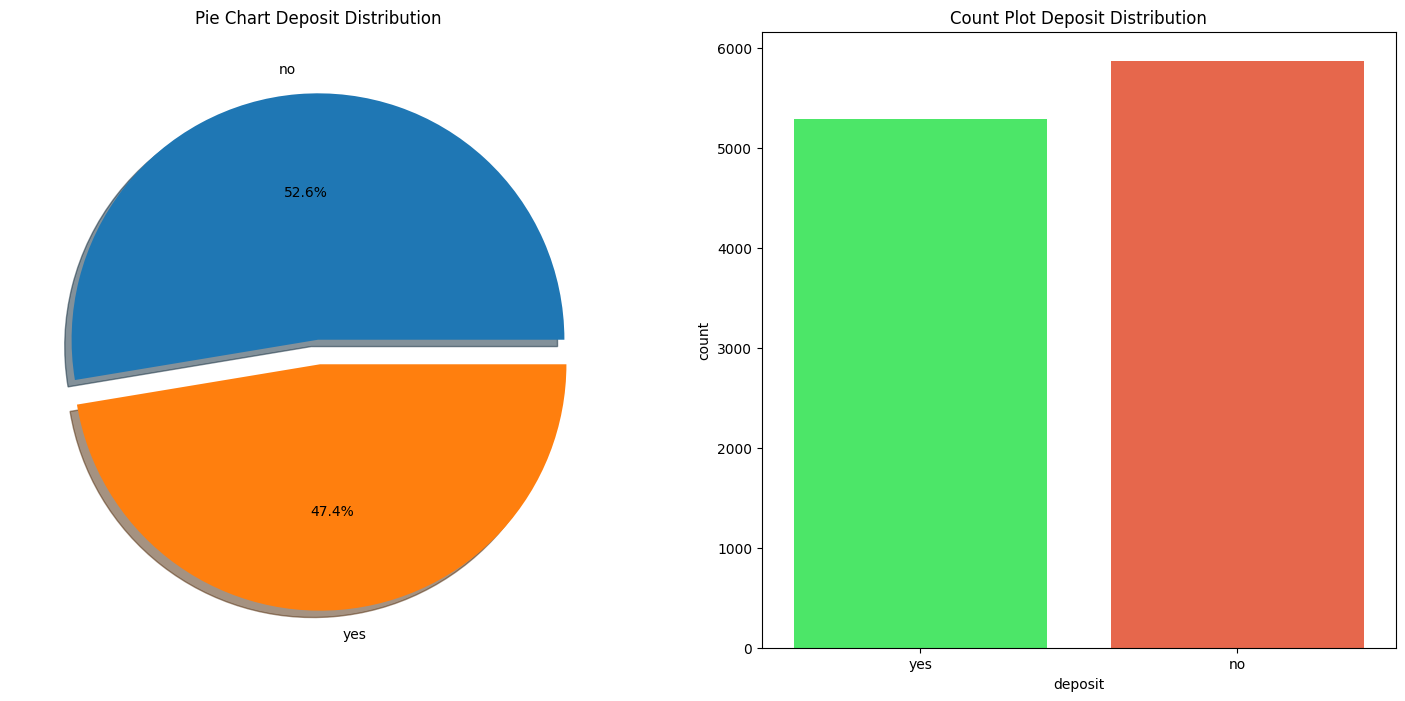

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
data['deposit'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0, 0.1], shadow = True)
ax[0].set_title('Pie Chart Deposit Distribution')
ax[0].set_ylabel('')

ax[1].set_title('Count Plot Deposit Distribution')
swapped_palette = ["#33FF57", "#FF5733"]
sns.countplot(data=data, x='deposit', hue='deposit', palette=swapped_palette, ax=ax[1])
plt.show()

### Age

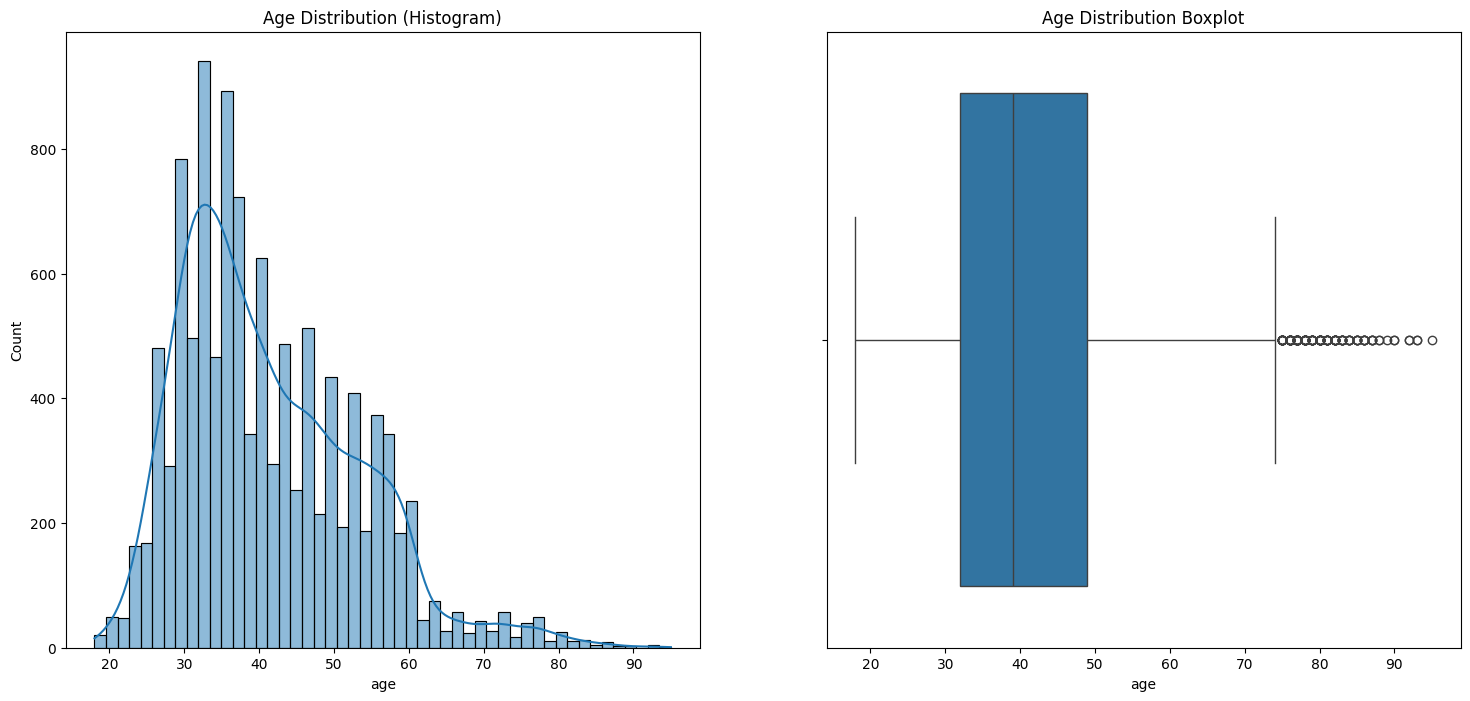

In [8]:
fig, ax = plt.subplots(1,2, figsize=(18, 8))
sns.histplot(data = data, x = 'age',  kde = True, bins = 50, ax = ax[0])
sns.boxplot(data = data, x = 'age')
ax[0].set_title('Age Distribution (Histogram)')
ax[1].set_title('Age Distribution Boxplot')
plt.show()

From the graph, we can see that age perform a right - skewed distribution as there is still an outlier on the age based on the boxplot

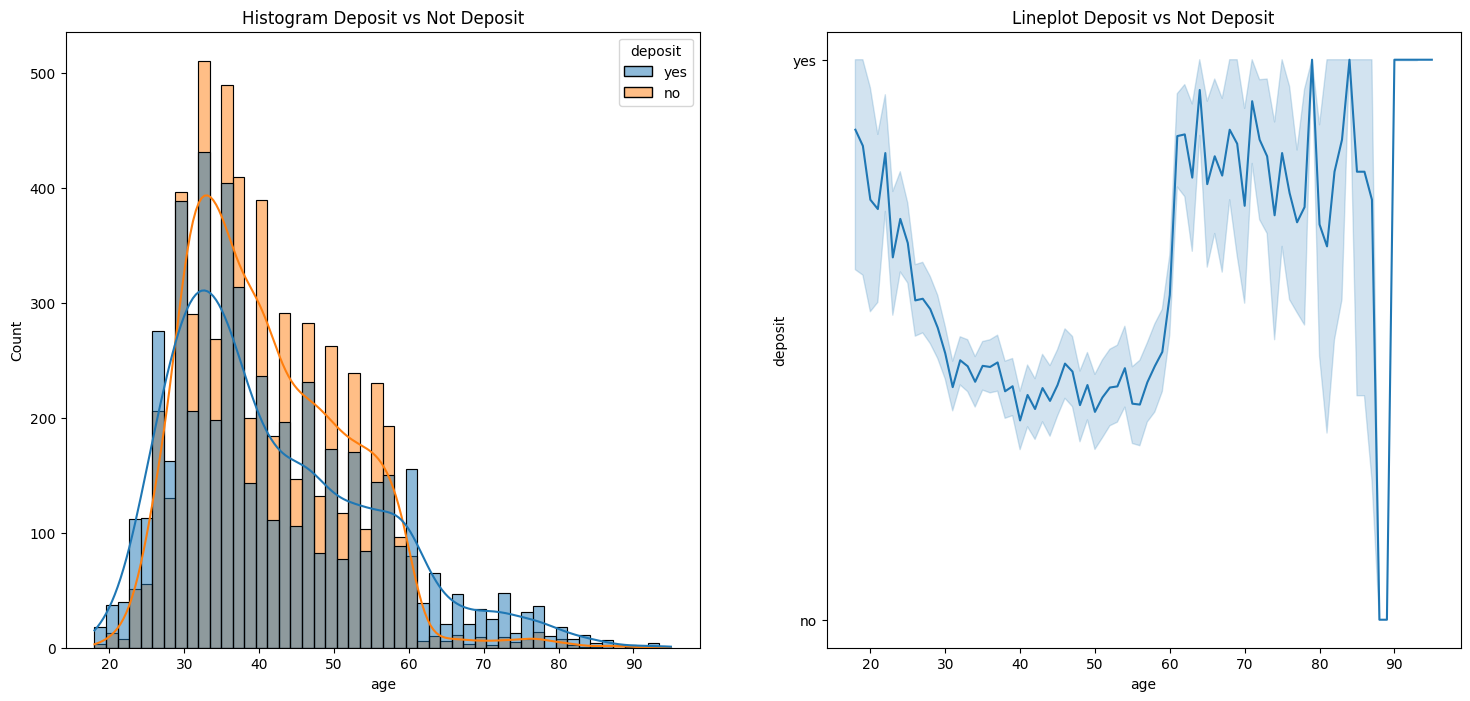

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = data, x = 'age', ax = ax [0], bins = 50, kde = True, hue = 'deposit')
sns.lineplot(data = data, x = 'age', y = 'deposit')
ax[0].set_title('Histogram Deposit vs Not Deposit')
ax[1].set_title('Lineplot Deposit vs Not Deposit')
plt.show()

Based on the greaph, we can see that at around age 30 - 60, more peoplde decide not to deposit while people < age 30 and people > age 60 decide to deposit

### Job -> Type of job

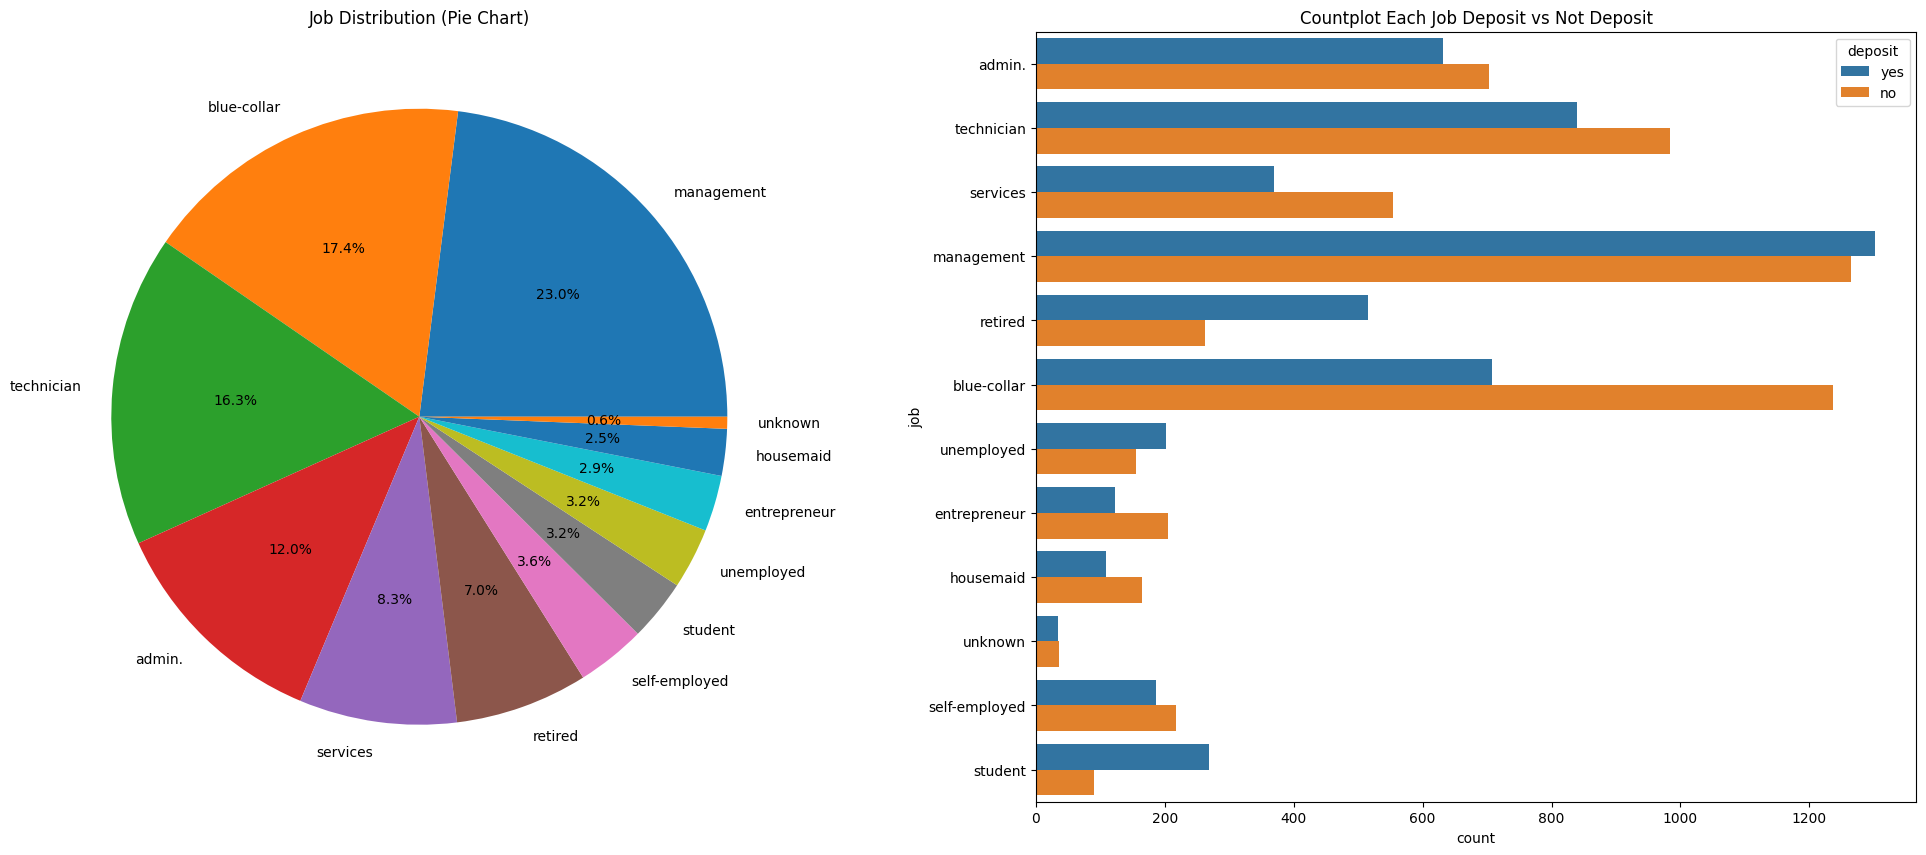

In [10]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))
data['job'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_title('Job Distribution (Pie Chart)')
sns.countplot(data = data, y = 'job', hue = 'deposit')
ax[1].set_title('Countplot Each Job Deposit vs Not Deposit')
plt.show()

Based on the graph, we can see that most type of jobs mostly prefer not to deposit where we can see that the distribution of deposit and not deposit, not deposit is more dominant

### Marital -> Marital status

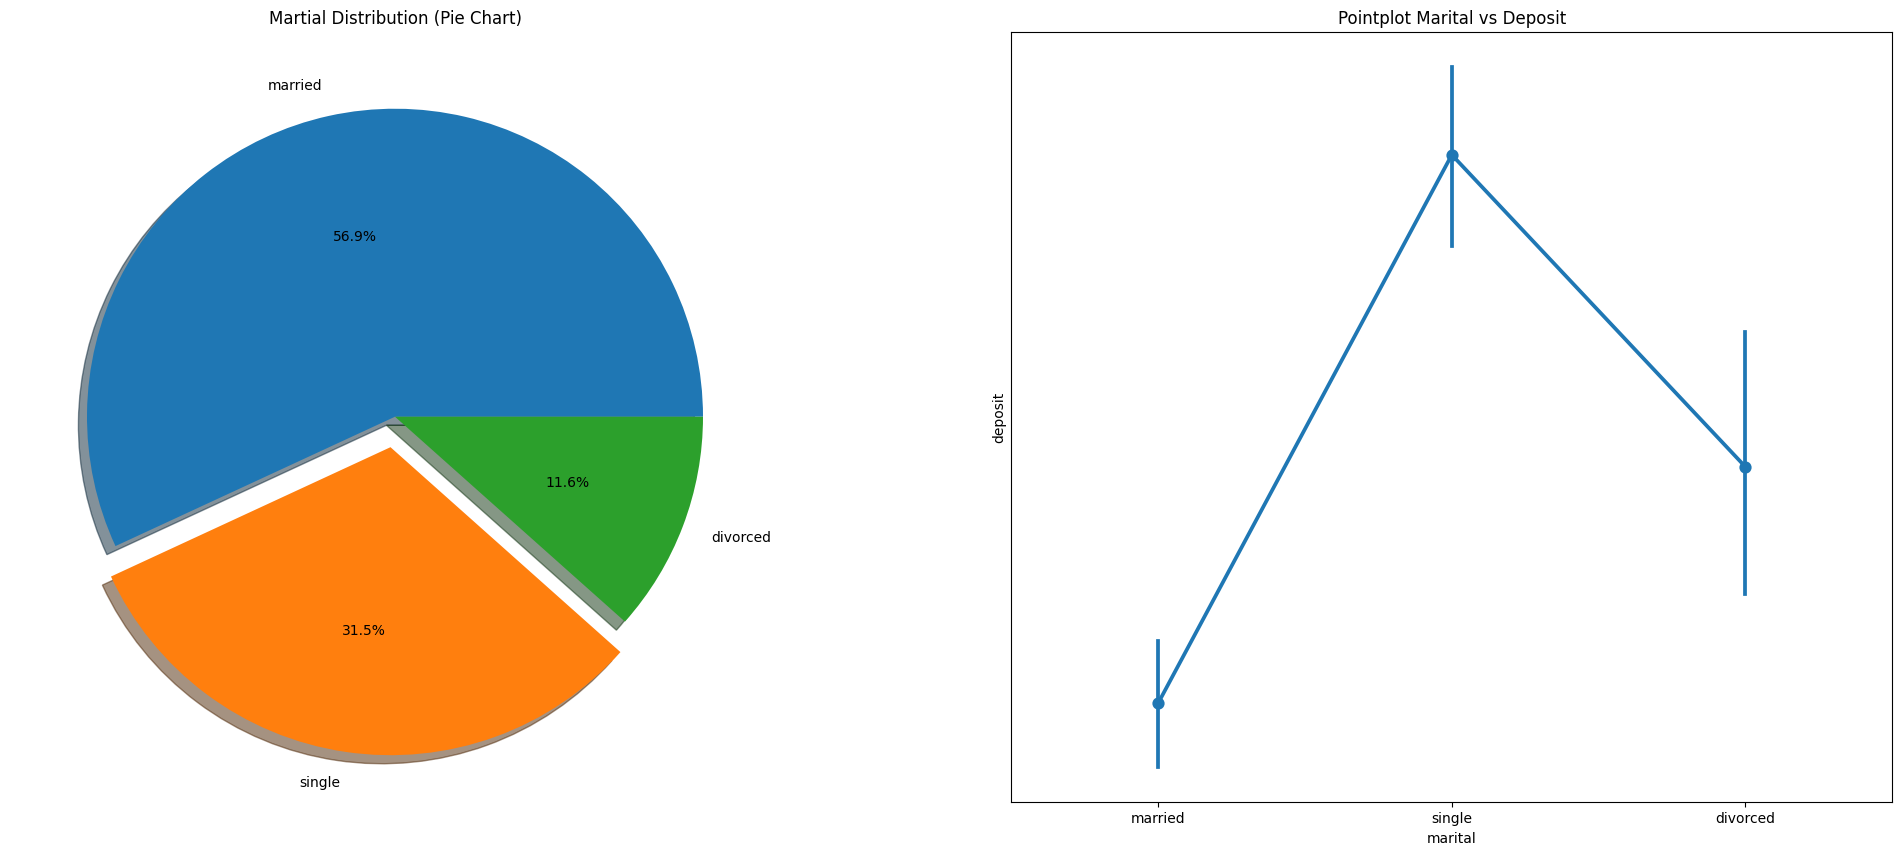

In [21]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))
data['marital'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', explode = [0, 0.1, 0], shadow = True)
ax[0].set_ylabel('')
ax[0].set_title('Martial Distribution (Pie Chart)')
sns.pointplot(data = data, x = 'marital', y = 'deposit')
ax[1].set_title('Pointplot Marital vs Deposit')
plt.show()

The graph informs us, that the customer with single martial status a higher chance of depositing, followed by divorced and lastly married

### Education